In [51]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix,roc_curve

## Load Dataset

In [2]:
#load dataset
df = pd.read_csv(r"A:\data science data sets\Logistic Regression Case Study\red wine quality\winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## EDA

In [3]:
#info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
#dulicate values
df.duplicated().sum()

240

In [6]:
#5 point summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#data types
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Checking for outliers

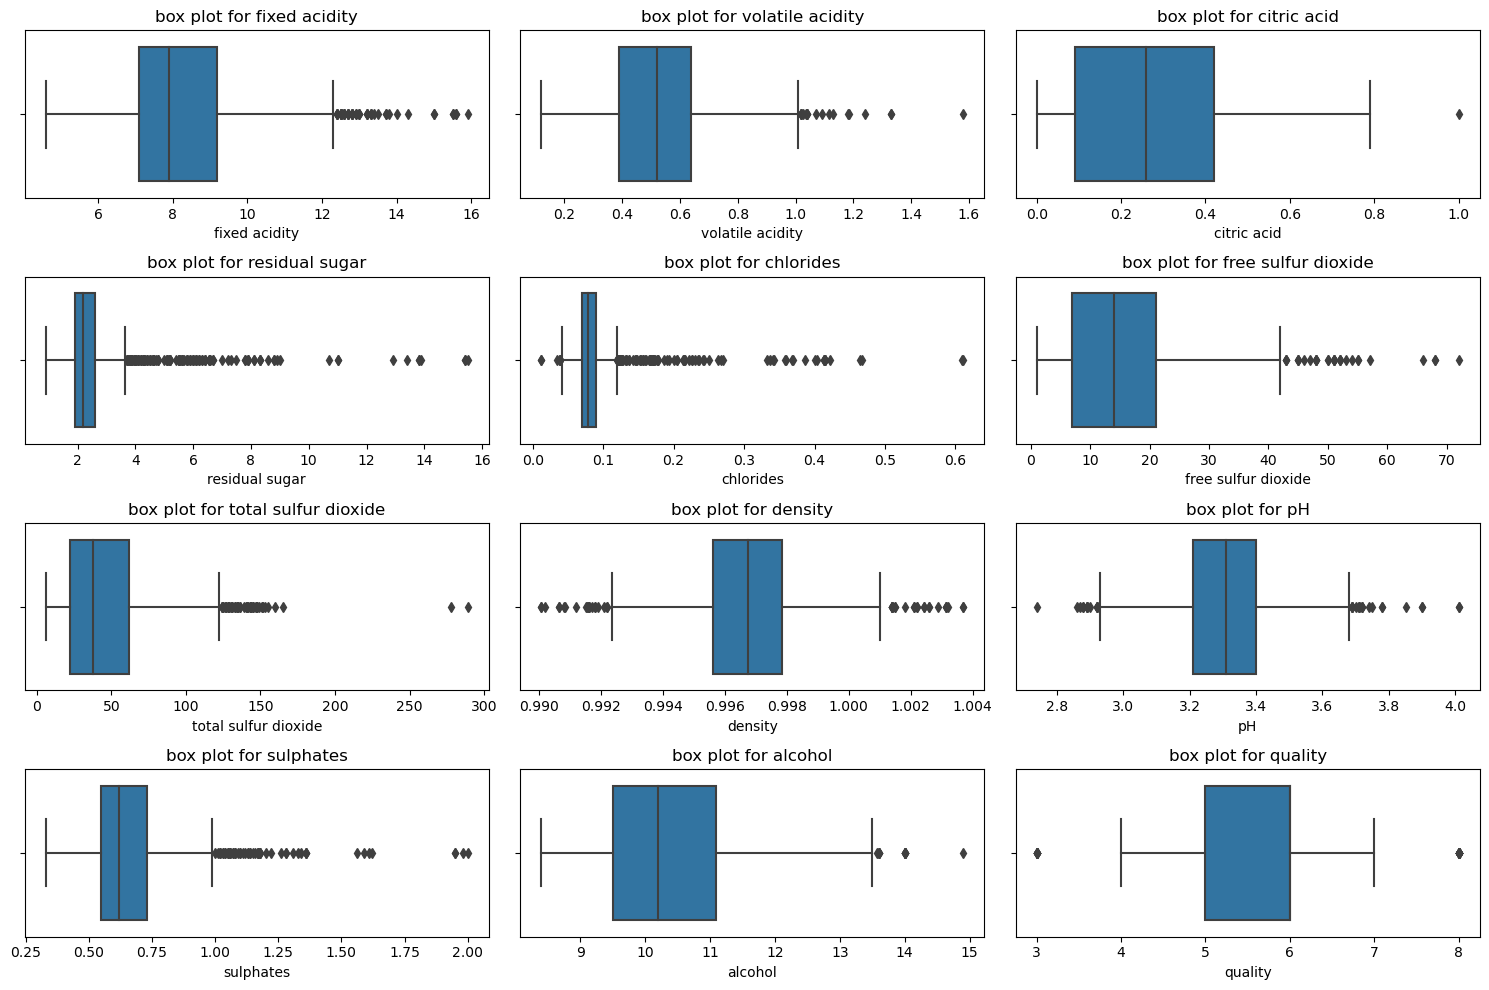

In [8]:
#box plot for checking outliers
columns = df.columns
fig,ax = plt.subplots(nrows = 4,ncols = 3,figsize =(15,10))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.boxplot(data = df,x=col,ax=ax[i])
    ax[i].set_title(f"box plot for {col}")
plt.tight_layout()
plt.show()

## Univariate Analysis

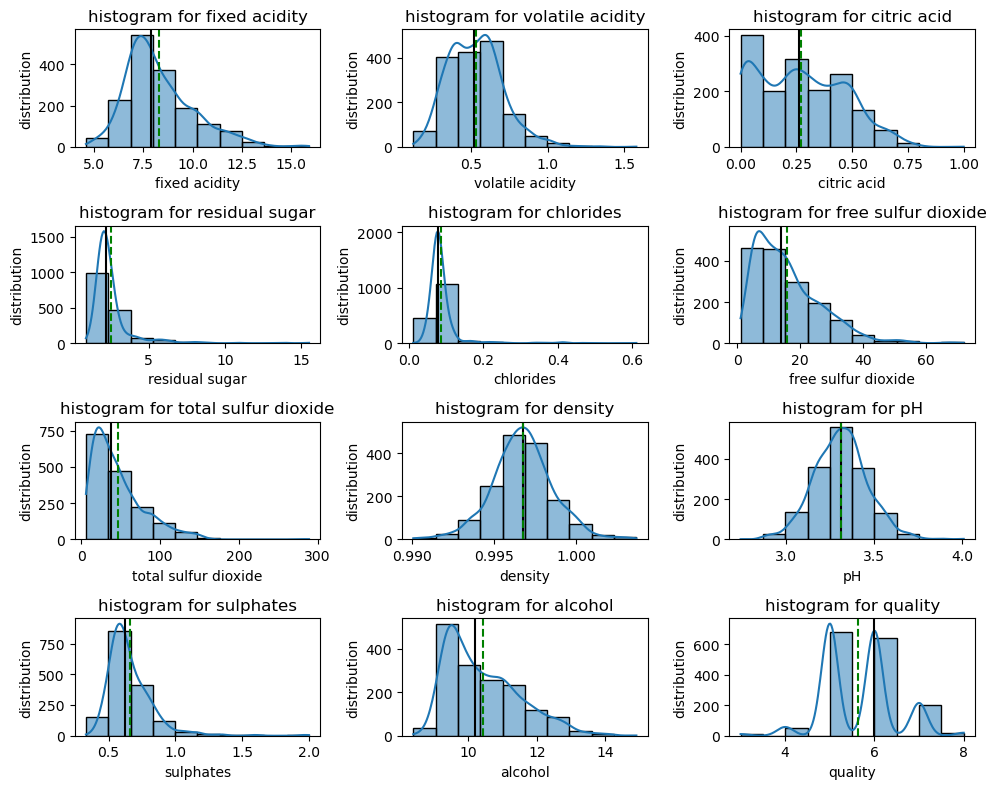

In [9]:
columns = df.columns
fig,ax = plt.subplots(nrows = 4,ncols = 3,figsize =(10,8))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.histplot(data = df,x=col,bins = 10,kde = True,ax = ax[i])
    ax[i].axvline(df[col].median(),color="black",linestyle="-")
    ax[i].axvline(df[col].mean(),color="green",linestyle="--")
    ax[i].set_title(f"histogram for {col}")
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("distribution")
plt.tight_layout()
plt.show()    

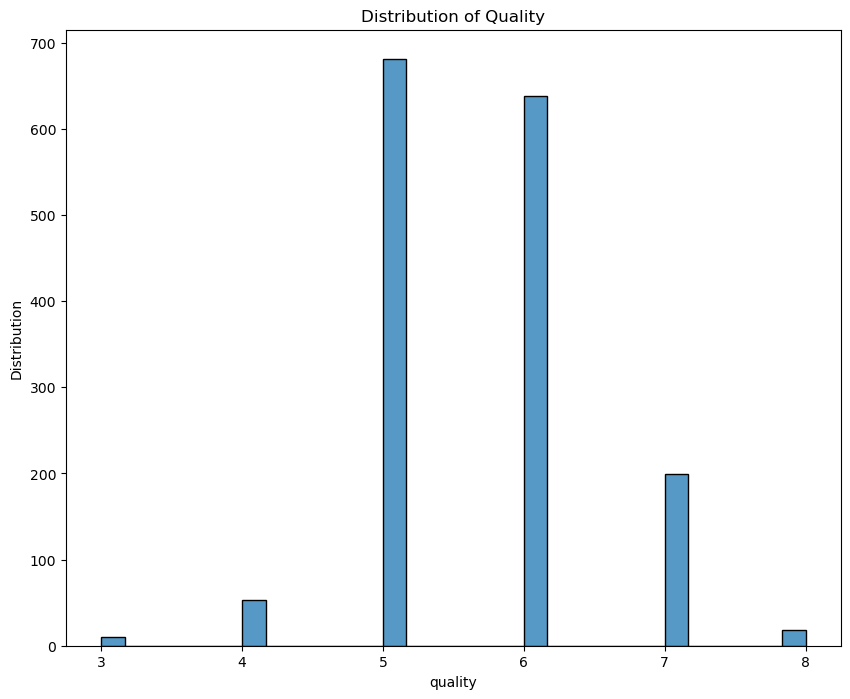

In [10]:
plt.figure(figsize=(10,8))
sns.histplot(df["quality"])
plt.xlabel("quality")
plt.ylabel("Distribution")
plt.title("Distribution of Quality")
plt.show()

In [11]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

## Bivariate Analysis

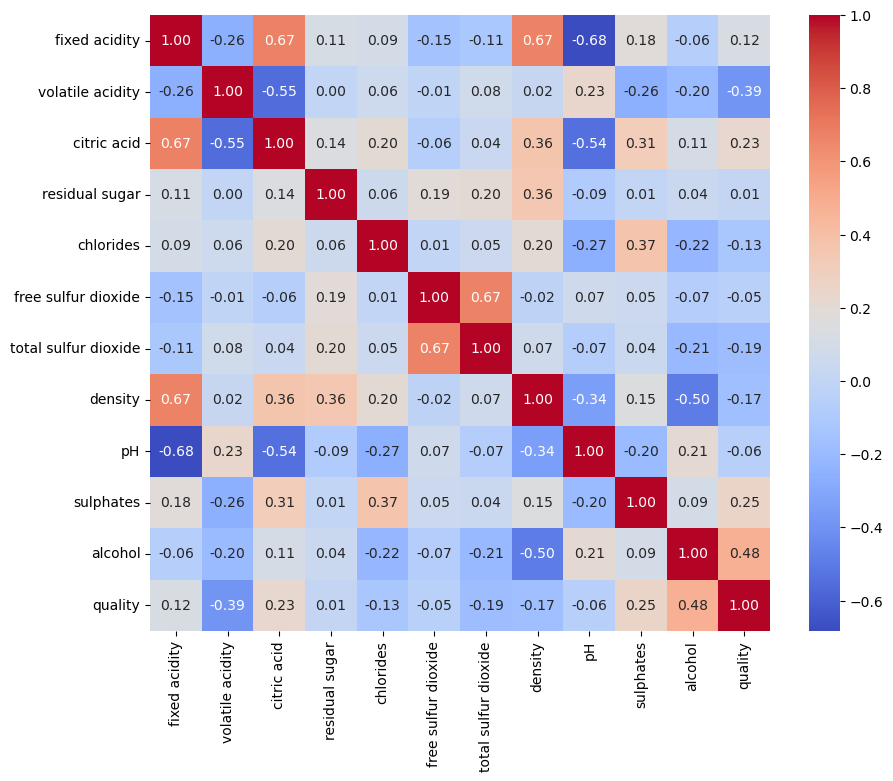

In [12]:
#heat map to see relationship between variables
correlation = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation,annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

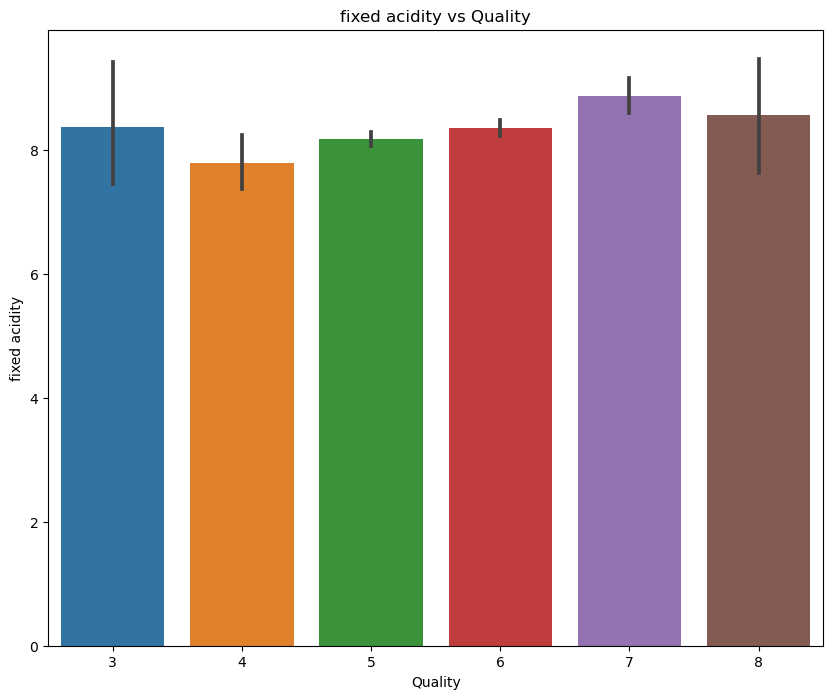

In [14]:
plt.figure(figsize = (10,8)) 
sns.barplot(df,y="fixed acidity",x="quality")
plt.ylabel("fixed acidity")
plt.xlabel("Quality")
plt.title("fixed acidity vs Quality")
plt.show()

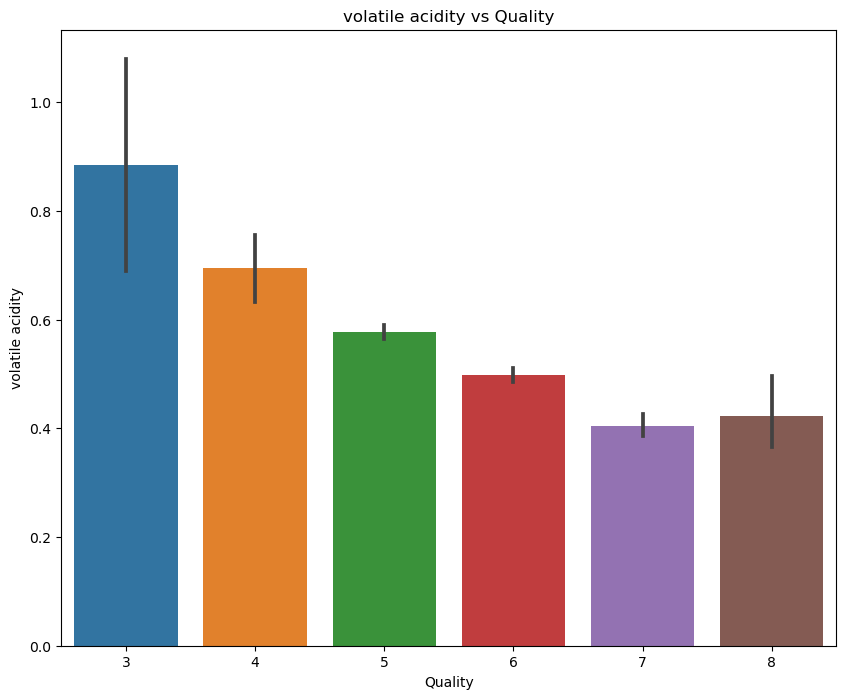

In [15]:
plt.figure(figsize = (10,8)) 
sns.barplot(df,y="volatile acidity",x="quality")
plt.ylabel("volatile acidity")
plt.xlabel("Quality")
plt.title("volatile acidity vs Quality")
plt.show()

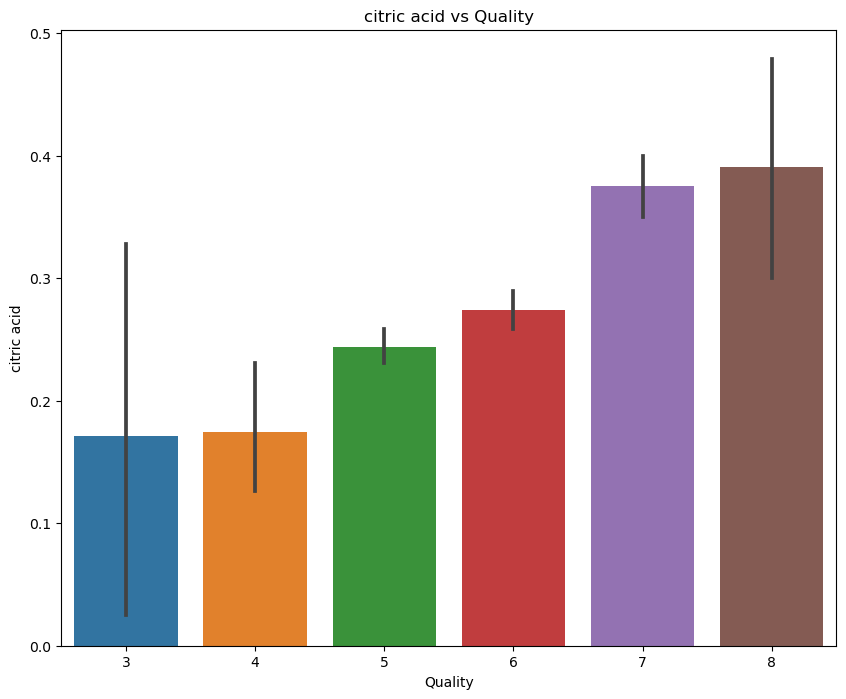

In [16]:
plt.figure(figsize = (10,8)) 
sns.barplot(df,y="citric acid",x="quality")
plt.ylabel("citric acid")
plt.xlabel("Quality")
plt.title("citric acid vs Quality")
plt.show()

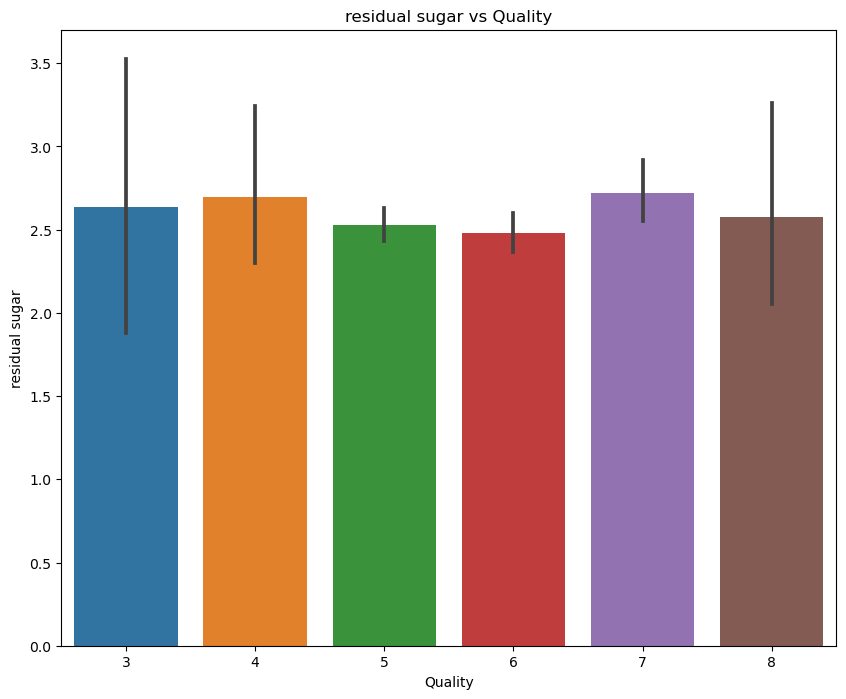

In [17]:
plt.figure(figsize = (10,8)) 
sns.barplot(df,y="residual sugar",x="quality")
plt.ylabel("residual sugar")
plt.xlabel("Quality")
plt.title("residual sugar vs Quality")
plt.show()

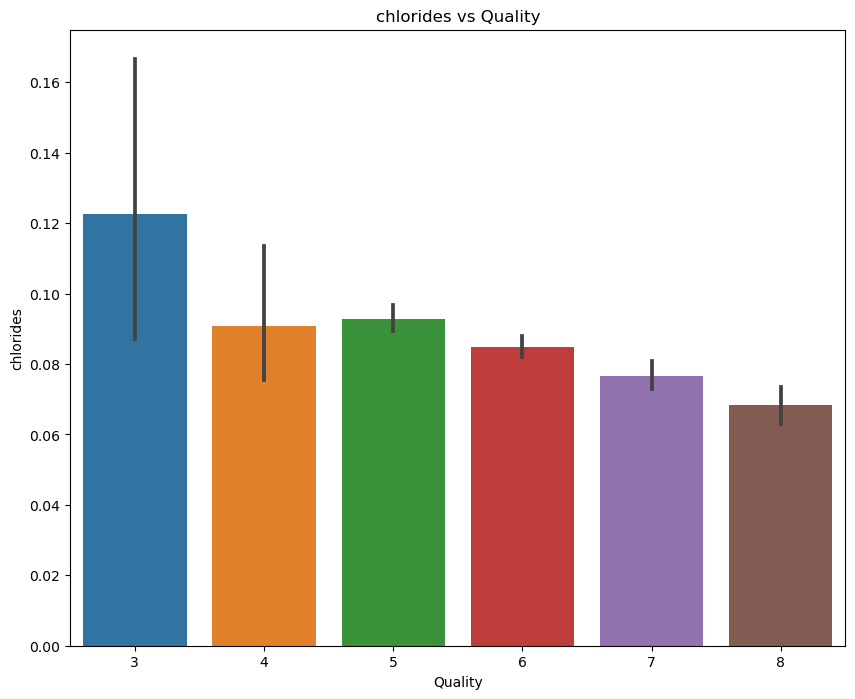

In [18]:
plt.figure(figsize = (10,8)) 
sns.barplot(df,y="chlorides",x="quality")
plt.ylabel("chlorides")
plt.xlabel("Quality")
plt.title("chlorides vs Quality")
plt.show()

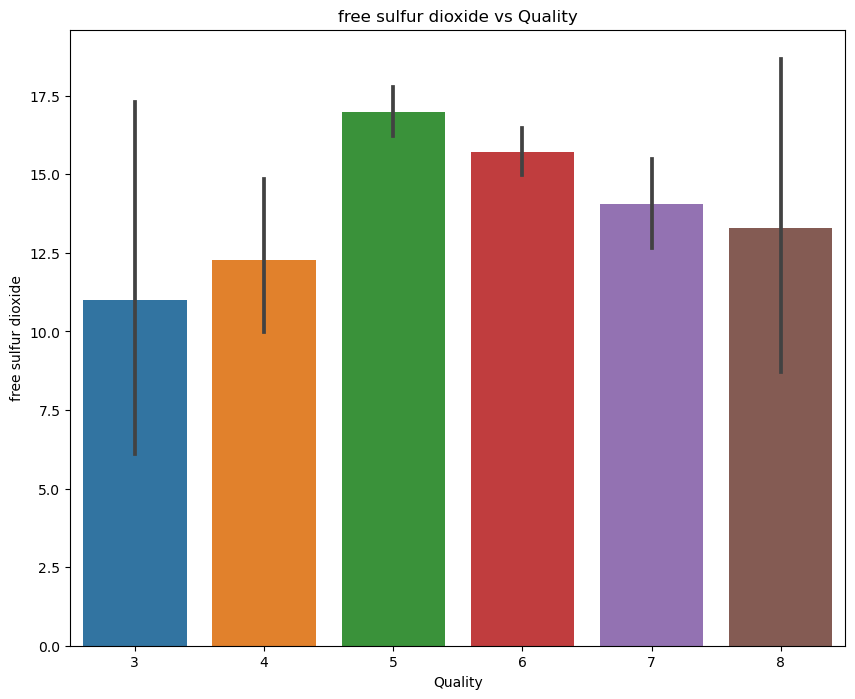

In [19]:
plt.figure(figsize = (10,8)) 
sns.barplot(df,y="free sulfur dioxide",x="quality")
plt.ylabel("free sulfur dioxide")
plt.xlabel("Quality")
plt.title("free sulfur dioxide vs Quality")
plt.show()

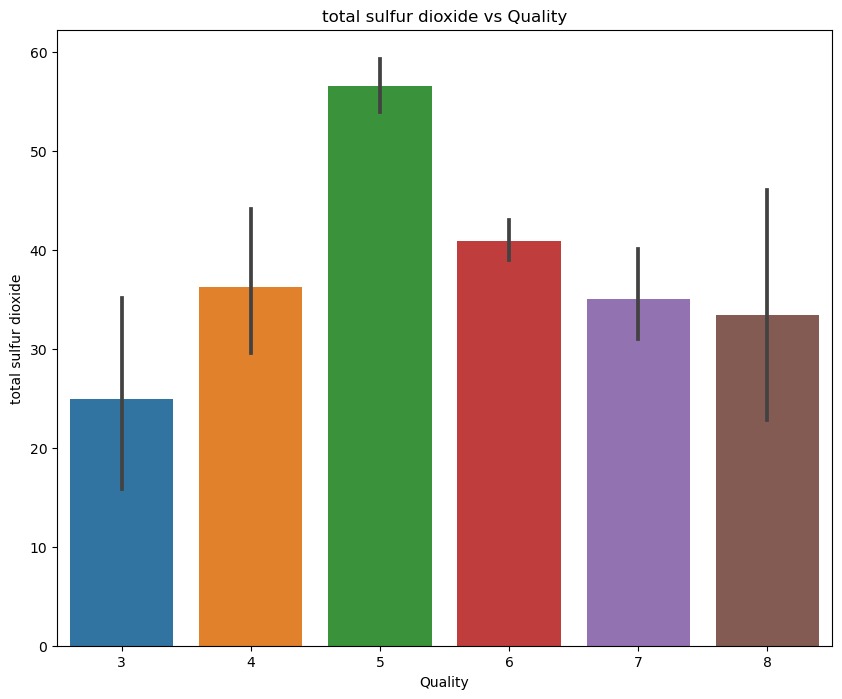

In [20]:
plt.figure(figsize = (10,8)) 
sns.barplot(df,y="total sulfur dioxide",x="quality")
plt.ylabel("total sulfur dioxide")
plt.xlabel("Quality")
plt.title("total sulfur dioxide vs Quality")
plt.show()

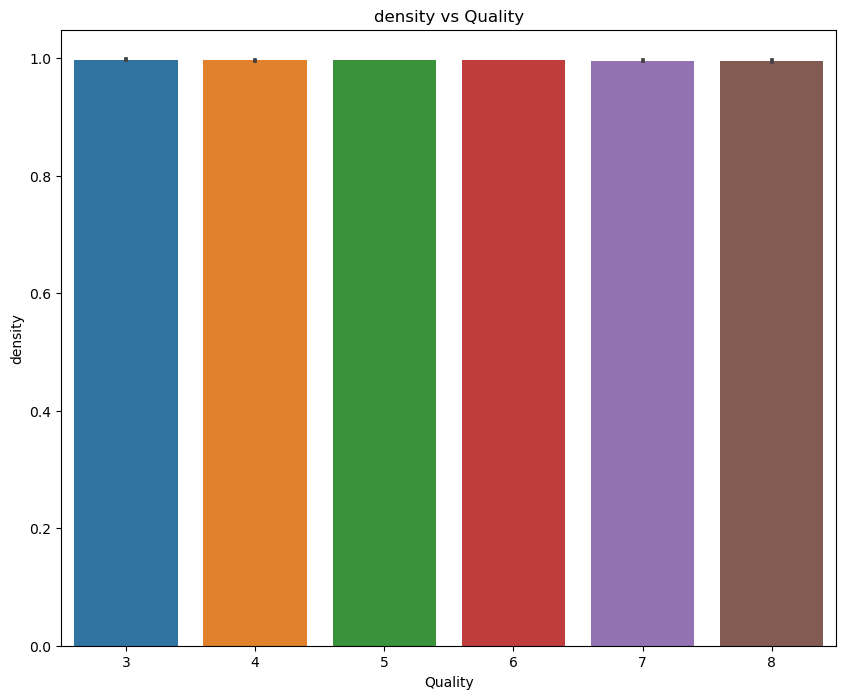

In [21]:
plt.figure(figsize = (10,8)) 
sns.barplot(df,y="density",x="quality")
plt.ylabel("density")
plt.xlabel("Quality")
plt.title("density vs Quality")
plt.show()

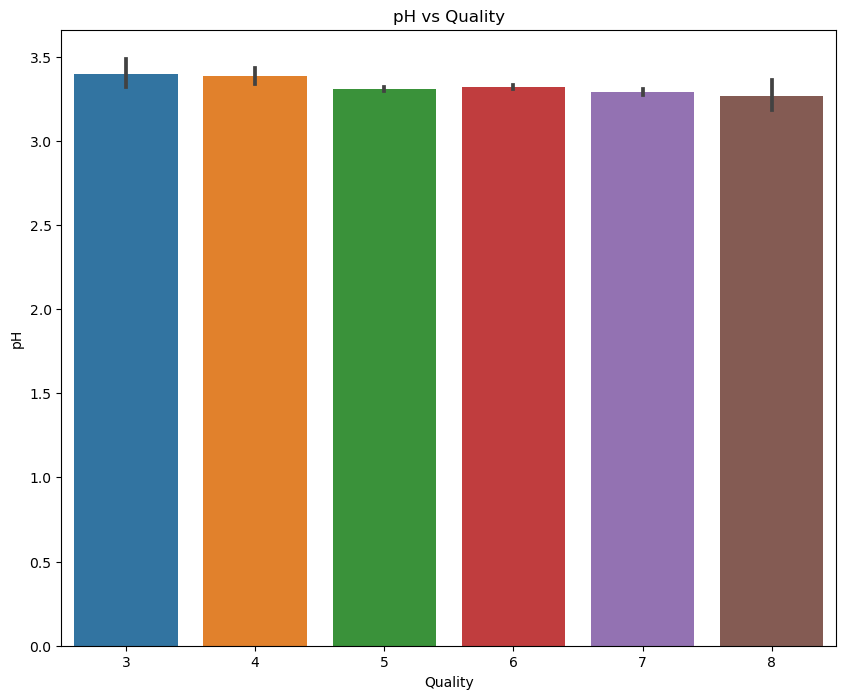

In [22]:
plt.figure(figsize = (10,8)) 
sns.barplot(df,y="pH",x="quality")
plt.ylabel("pH")
plt.xlabel("Quality")
plt.title("pH vs Quality")
plt.show()

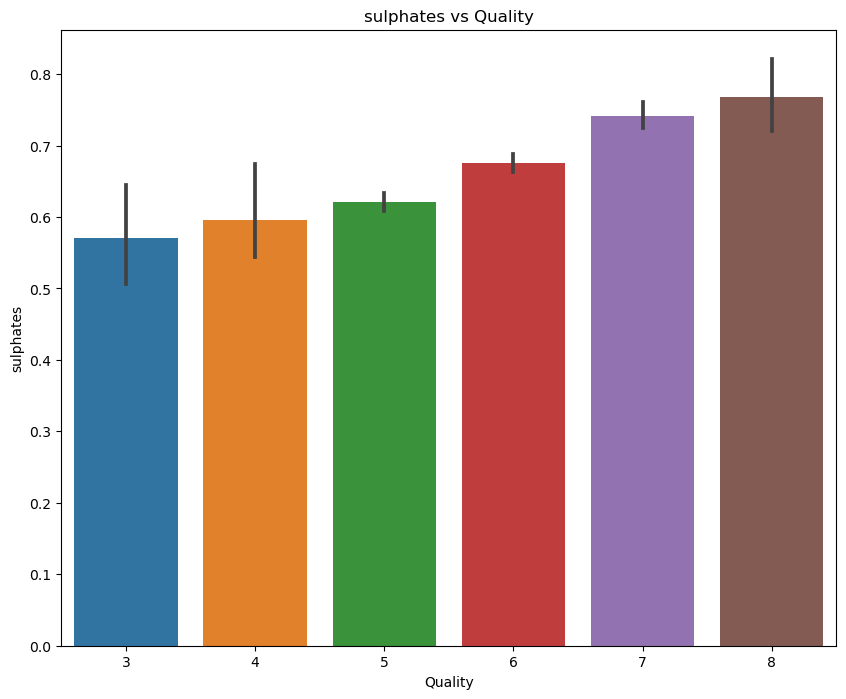

In [23]:
plt.figure(figsize = (10,8)) 
sns.barplot(df,y="sulphates",x="quality")
plt.ylabel("sulphates")
plt.xlabel("Quality")
plt.title("sulphates vs Quality")
plt.show()

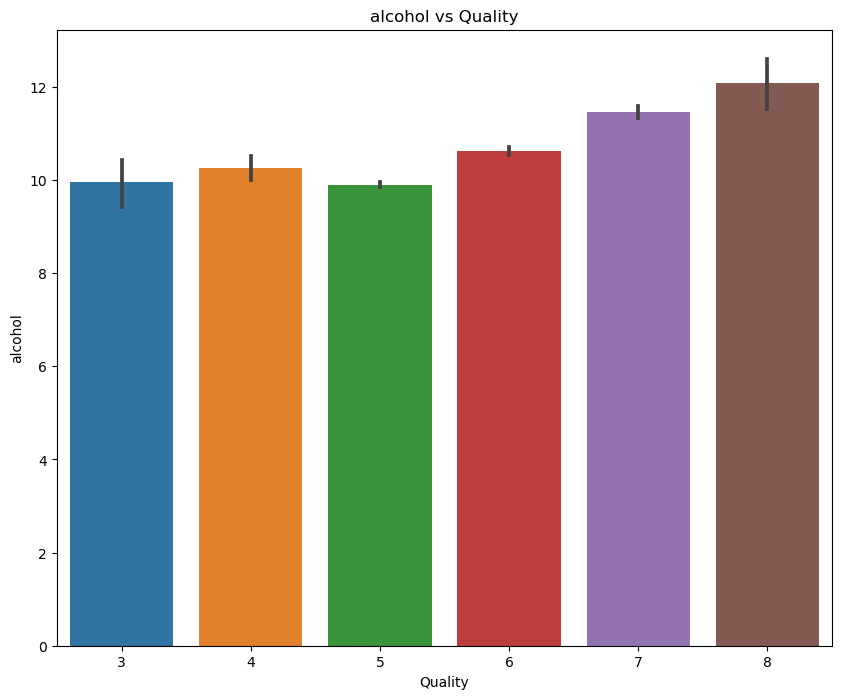

In [24]:
plt.figure(figsize = (10,8)) 
sns.barplot(df,y="alcohol",x="quality")
plt.ylabel("alcohol")
plt.xlabel("Quality")
plt.title("alcohol vs Quality")
plt.show()

## Data Preprocessing

In [4]:
#dropping duplicatet values
df = df.drop_duplicates()

In [5]:
df.duplicated().sum()

0

In [6]:
df["quality"] = [1 if x >= 7 else 0 for x in df["quality"]]

In [7]:
df["quality"].value_counts()

quality
0    1175
1     184
Name: count, dtype: int64

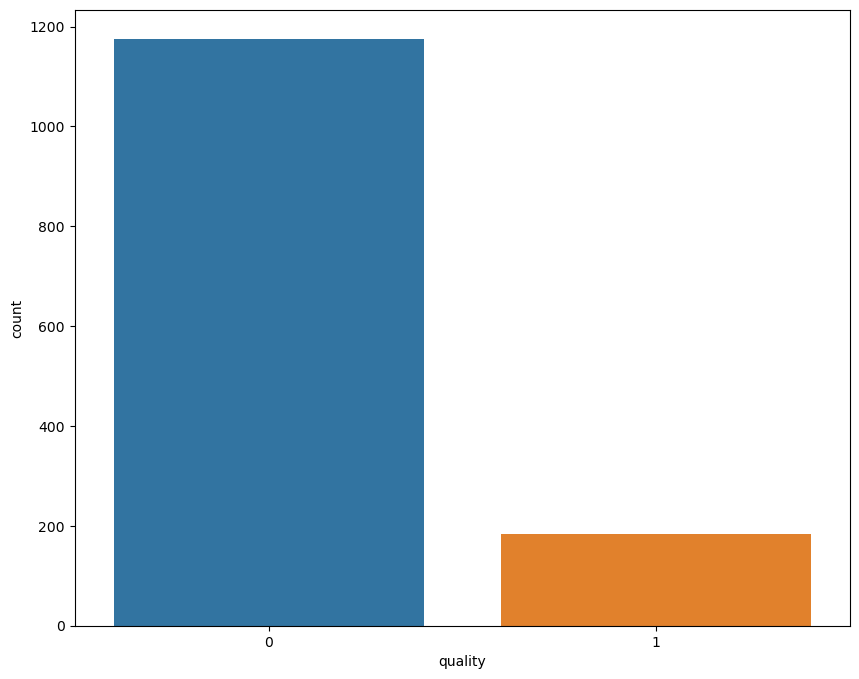

In [80]:
plt.figure(figsize=(10, 8))
sns.countplot(x="quality", data=df)
plt.show()

In [81]:
df["quality"].value_counts()

quality
0    1175
1     184
Name: count, dtype: int64

## splitting data to dependent and independent variables

In [8]:
x = df.drop("quality",axis=1)
y=df["quality"]

In [9]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [10]:
type(x)

pandas.core.frame.DataFrame

##  checking multicollinearity using  VIF

In [11]:
VIF = pd.DataFrame()
VIF["Features"] = x.columns
VIF["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF.sort_values(by="VIF",ascending=False)

,Features,VIF
7,density,1500.387873
8,pH,1095.732046
10,alcohol,123.097449
0,fixed acidity,75.023032
9,sulphates,21.946341
1,volatile acidity,16.460387
2,citric acid,9.188892
6,total sulfur dioxide,6.543918
5,free sulfur dioxide,6.432241
4,chlorides,6.349793


In [12]:
#Removing density column from indepensent variables
x = x.drop("density",axis=1)
VIF = pd.DataFrame()
VIF["Features"] = x.columns
VIF["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF.sort_values(by="VIF",ascending=False)

,Features,VIF
7,pH,156.463988
9,alcohol,121.230168
0,fixed acidity,39.788912
8,sulphates,21.904620
1,volatile acidity,16.446549
2,citric acid,9.151754
5,free sulfur dioxide,6.377128
6,total sulfur dioxide,6.095400
4,chlorides,5.793713
3,residual sugar,4.915705


In [13]:
#removing PH column from independent variables
x = x.drop("pH",axis=1)
VIF = pd.DataFrame()
VIF["Features"] = x.columns
VIF["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF.sort_values(by="VIF",ascending=False)

,Features,VIF
0,fixed acidity,37.030433
8,alcohol,36.856500
7,sulphates,21.622546
1,volatile acidity,15.091381
2,citric acid,8.619115
5,free sulfur dioxide,6.342563
6,total sulfur dioxide,5.974092
4,chlorides,5.706700
3,residual sugar,4.912710


In [14]:
#removing fixed acidity column from independent variables
x = x.drop("fixed acidity",axis=1)
VIF = pd.DataFrame()
VIF["Features"] = x.columns
VIF["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF.sort_values(by="VIF",ascending=False)

,Features,VIF
7,alcohol,31.660363
6,sulphates,21.042565
0,volatile acidity,12.425905
4,free sulfur dioxide,6.329246
5,total sulfur dioxide,5.888906
3,chlorides,5.664616
1,citric acid,4.946482
2,residual sugar,4.890708


In [15]:
#removing alcohol column from independent variables
x = x.drop("alcohol",axis=1)
VIF = pd.DataFrame()
VIF["Features"] = x.columns
VIF["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF.sort_values(by="VIF",ascending=False)

,Features,VIF
6,sulphates,13.210972
0,volatile acidity,7.229110
4,free sulfur dioxide,6.034876
5,total sulfur dioxide,5.657409
3,chlorides,5.250887
2,residual sugar,4.647363
1,citric acid,4.266631


In [16]:
#removing sulphate column from independent variables
x = x.drop("sulphates",axis=1)
VIF = pd.DataFrame()
VIF["Features"] = x.columns
VIF["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF.sort_values(by="VIF",ascending=False)

,Features,VIF
4,free sulfur dioxide,5.653864
5,total sulfur dioxide,5.610302
0,volatile acidity,5.354702
2,residual sugar,4.619559
3,chlorides,4.527888
1,citric acid,3.095777


## Scaling the data

In [19]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [20]:
x_scaled

array([[ 0.93200015, -1.39325797, -0.46115707, -0.2456228 , -0.46855352,
        -0.38404973],
       [ 1.91580043, -1.39325797,  0.05666484,  0.20009403,  0.87200276,
         0.60407328],
       [ 1.25993358, -1.18861732, -0.16525884,  0.07853489, -0.08553744,
         0.2148127 ],
       ...,
       [ 0.11216658, -0.88165635, -0.23923339, -0.52926078,  2.21255903,
         0.12498334],
       [ 0.63139451, -0.77933603, -0.38718251, -0.26588266,  1.54228089,
        -0.08461851],
       [-1.19956712,  1.01126962,  0.79641041, -0.4279615 ,  0.20172462,
        -0.14450476]])

## Train Test split

In [21]:
#splitting data into trin and test data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 42)

In [19]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1087, 6) (272, 6) (1087,) (272,)


## Applying Logistic Regression 

In [104]:
regressor = LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression()

## matrics evaluation 

In [105]:
#for training data
y_pred = regressor.predict(x_train)
#precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
print("precision score:", precision_score(y_train,y_pred))
print("recall score:", recall_score(y_train,y_pred))
print("f1 score:",f1_score(y_train,y_pred))
print("accuracy_score:", accuracy_score(y_train,y_pred))
print("roc_auc_score:",roc_auc_score(y_train,y_pred))
print("confusion_matrix:", confusion_matrix(y_train,y_pred))

precision score: 0.23076923076923078
recall score: 0.02
f1 score: 0.03680981595092025
accuracy_score: 0.8555657773689053
roc_auc_score: 0.5046638207043757
confusion_matrix: [[927  10]
 [147   3]]


In [106]:
#for testing data
y_pred = regressor.predict(x_test)
#precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
print("precision score:", precision_score(y_test,y_pred))
print("recall score:", recall_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))
print("accuracy_score:", accuracy_score(y_test,y_pred))
print("roc_auc_score:",roc_auc_score(y_test,y_pred))
print("confusion_matrix:", confusion_matrix(y_test,y_pred))

precision score: 0.5
recall score: 0.029411764705882353
f1 score: 0.05555555555555555
accuracy_score: 0.875
roc_auc_score: 0.5126050420168067
confusion_matrix: [[237   1]
 [ 33   1]]


##  Over Sampling

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
sm = SMOTE(sampling_strategy = 1,k_neighbors=5,random_state=1)

In [24]:
x_resampled,y_resampled = sm.fit_resample(x_scaled,y)

In [25]:
y_resampled.value_counts()

quality
0    1175
1    1175
Name: count, dtype: int64

## Train Test split

In [31]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

In [32]:
scaler1 = StandardScaler()

In [33]:
x_train1 = scaler1.fit_transform(x_train1)
x_test1 = scaler1.transform(x_test1)

## Applying Logistic Regression after over sampling

In [57]:
logistic = LogisticRegression(random_state = 1)

In [58]:
logistic.fit(x_train1,y_train1)

LogisticRegression(random_state=1)

## Metrics score after over sampling

In [105]:
#for training data
y_pred = logistic.predict(x_train1)
#precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
print("precision score:", precision_score(y_train1,y_pred))
print("recall score:", recall_score(y_train1,y_pred))
print("f1 score:",f1_score(y_train1,y_pred))
print("accuracy_score:", accuracy_score(y_train1,y_pred))
print("roc_auc_score:",roc_auc_score(y_train1,y_pred))
print("confusion_matrix:", confusion_matrix(y_train1,y_pred))
logistic_train_score = accuracy_score(y_train1,y_pred)
logistic_train_score=round(logistic_train_score,2)*100

precision score: 0.7207859358841778
recall score: 0.743863393810032
f1 score: 0.7321428571428571
accuracy_score: 0.7287234042553191
roc_auc_score: 0.7287715696515694
confusion_matrix: [[673 270]
 [240 697]]


In [106]:
#for testing data
y_pred1 = logistic.predict(x_test1)
#precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
print("precision score:", precision_score(y_test1,y_pred1))
print("recall score:", recall_score(y_test1,y_pred1))
print("f1 score:",f1_score(y_test1,y_pred1))
print("accuracy_score:", accuracy_score(y_test1,y_pred1))
print("roc_auc_score:",roc_auc_score(y_test1,y_pred1))
print("confusion_matrix:", confusion_matrix(y_test1,y_pred1))
logistic_test_score = accuracy_score(y_test1,y_pred1)
logistic_test_score=round(logistic_test_score,2)*100

precision score: 0.7137404580152672
recall score: 0.7857142857142857
f1 score: 0.748
accuracy_score: 0.7319148936170212
roc_auc_score: 0.7312192118226601
confusion_matrix: [[157  75]
 [ 51 187]]


## Decision Tree Classifier

In [62]:
dt = DecisionTreeClassifier(random_state=1)

In [63]:
dt.fit(x_train1,y_train1)

DecisionTreeClassifier(random_state=1)

## Metrics score

In [64]:
#for training data
y_pred = dt.predict(x_train1)
#precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
print("precision score:", precision_score(y_train1,y_pred))
print("recall score:", recall_score(y_train1,y_pred))
print("f1 score:",f1_score(y_train1,y_pred))
print("accuracy_score:", accuracy_score(y_train1,y_pred))
print("roc_auc_score:",roc_auc_score(y_train1,y_pred))
print("confusion_matrix:", confusion_matrix(y_train1,y_pred))

precision score: 1.0
recall score: 1.0
f1 score: 1.0
accuracy_score: 1.0
roc_auc_score: 1.0
confusion_matrix: [[943   0]
 [  0 937]]


In [65]:
#testing data score
y_pred = dt.predict(x_test1)
#precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
print("precision score:", precision_score(y_test1,y_pred))
print("recall score:", recall_score(y_test1,y_pred))
print("f1 score:",f1_score(y_test1,y_pred))
print("accuracy_score:", accuracy_score(y_test1,y_pred))
print("roc_auc_score:",roc_auc_score(y_test1,y_pred))
print("confusion_matrix:", confusion_matrix(y_test1,y_pred))

precision score: 0.8375
recall score: 0.8445378151260504
f1 score: 0.8410041841004184
accuracy_score: 0.8382978723404255
roc_auc_score: 0.8382171834250942
confusion_matrix: [[193  39]
 [ 37 201]]


## Hyper Parameter tuning

## Apply Grid Search CV for best estimator parameters

In [70]:
parameters = {"max_depth":np.arange(3,10,1),
               "max_leaf_nodes":np.arange(50,300),
               "min_samples_split":np.arange(10,100,10)}

In [71]:
grid_obj = GridSearchCV(dt,parameters,cv=5,verbose=1)

In [ ]:
grid_obj = grid_obj.fit(x_train1,y_train1)

In [73]:
best_rf = grid_obj.best_estimator_
best_rf

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

In [75]:
grid_obj.fit(x_train1,y_train1)

Fitting 5 folds for each of 15750 candidates, totalling 78750 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       11...
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
       258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
       271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283,
       284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296,
       297, 298, 299]),
                         'min_samples_split': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             verbose=1)

In [107]:
#training data score
#for training data
y_pred = grid_obj.predict(x_train1)
#precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
print("precision score:", precision_score(y_train1,y_pred))
print("recall score:", recall_score(y_train1,y_pred))
print("f1 score:",f1_score(y_train1,y_pred))
print("accuracy_score:", accuracy_score(y_train1,y_pred))
print("roc_auc_score:",roc_auc_score(y_train1,y_pred))
print("confusion_matrix:", confusion_matrix(y_train1,y_pred))
decisiontree_train_score = accuracy_score(y_train1,y_pred)
decisiontree_train_score=round(decisiontree_train_score,2)*100

precision score: 0.8493150684931506
recall score: 0.9263607257203842
f1 score: 0.8861664114344053
accuracy_score: 0.8813829787234042
roc_auc_score: 0.8815260680563745
confusion_matrix: [[789 154]
 [ 69 868]]


In [108]:
#testing data score
#for testinng data
y_pred = grid_obj.predict(x_test1)
#precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
print("precision score:", precision_score(y_test1,y_pred))
print("recall score:", recall_score(y_test1,y_pred))
print("f1 score:",f1_score(y_test1,y_pred))
print("accuracy_score:", accuracy_score(y_test1,y_pred))
print("roc_auc_score:",roc_auc_score(y_test1,y_pred))
print("confusion_matrix:", confusion_matrix(y_test1,y_pred))
decisiontree_test_score = accuracy_score(y_test1,y_pred)
decisiontree_test_score=round(decisiontree_test_score,2)*100

precision score: 0.8031496062992126
recall score: 0.8571428571428571
f1 score: 0.8292682926829268
accuracy_score: 0.8212765957446808
roc_auc_score: 0.8208128078817735
confusion_matrix: [[182  50]
 [ 34 204]]


## Random Forest Classifier

In [34]:
rf_classifier = RandomForestClassifier()

In [35]:
rf_classifier.fit(x_train1,y_train1)

RandomForestClassifier()

In [36]:
#Training data score
#for training data
y_pred = rf_classifier.predict(x_train1)
#precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
print("precision score:", precision_score(y_train1,y_pred))
print("recall score:", recall_score(y_train1,y_pred))
print("f1 score:",f1_score(y_train1,y_pred))
print("accuracy_score:", accuracy_score(y_train1,y_pred))
print("roc_auc_score:",roc_auc_score(y_train1,y_pred))
print("confusion_matrix:", confusion_matrix(y_train1,y_pred))

precision score: 1.0
recall score: 1.0
f1 score: 1.0
accuracy_score: 1.0
roc_auc_score: 1.0
confusion_matrix: [[943   0]
 [  0 937]]


In [37]:
#Testing data score
#for training data
y_pred = rf_classifier.predict(x_test1)
#precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
print("precision score:", precision_score(y_test1,y_pred))
print("recall score:", recall_score(y_test1,y_pred))
print("f1 score:",f1_score(y_test1,y_pred))
print("accuracy_score:", accuracy_score(y_test1,y_pred))
print("roc_auc_score:",roc_auc_score(y_test1,y_pred))
print("confusion_matrix:", confusion_matrix(y_test1,y_pred))

precision score: 0.9017094017094017
recall score: 0.8865546218487395
f1 score: 0.8940677966101694
accuracy_score: 0.8936170212765957
roc_auc_score: 0.8937083454071283
confusion_matrix: [[209  23]
 [ 27 211]]


## Hyper Tuning

In [38]:
parameters = {"n_estimators":[100,200,300],
              "max_depth":[10,20,30],
              "min_samples_split":[2,5,10],
              "min_samples_leaf":[1,2,4],
              "criterion":["gini", "entropy", "log_loss"],
              "max_features":["sqrt", "log2", None]
    
}

In [39]:
grid_obj1 = GridSearchCV(estimator=rf_classifier,param_grid=parameters,cv=5,scoring="accuracy",verbose=1)

In [40]:
grid_obj1 = grid_obj1.fit(x_train1,y_train1)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


In [41]:
best_rf1 = grid_obj1.best_estimator_
best_rf1

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       n_estimators=300)

In [45]:
#training data score
#for training data
y_pred = best_rf1.predict(x_train1)
#precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
print("precision score:", precision_score(y_train1,y_pred))
print("recall score:", recall_score(y_train1,y_pred))
print("f1 score:",f1_score(y_train1,y_pred))
print("accuracy_score:", accuracy_score(y_train1,y_pred))
print("roc_auc_score:",roc_auc_score(y_train1,y_pred))
print("confusion_matrix:", confusion_matrix(y_train1,y_pred))

precision score: 1.0
recall score: 1.0
f1 score: 1.0
accuracy_score: 1.0
roc_auc_score: 1.0
confusion_matrix: [[943   0]
 [  0 937]]


In [46]:
#testing data score
#for testinng data
y_pred = best_rf1.predict(x_test1)
#precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
print("precision score:", precision_score(y_test1,y_pred))
print("recall score:", recall_score(y_test1,y_pred))
print("f1 score:",f1_score(y_test1,y_pred))
print("accuracy_score:", accuracy_score(y_test1,y_pred))
print("roc_auc_score:",roc_auc_score(y_test1,y_pred))
print("confusion_matrix:", confusion_matrix(y_test1,y_pred))

precision score: 0.8884297520661157
recall score: 0.9033613445378151
f1 score: 0.8958333333333334
accuracy_score: 0.8936170212765957
roc_auc_score: 0.8934910170964937
confusion_matrix: [[205  27]
 [ 23 215]]


In [ ]:
rf_classifier1 = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, n_estimators=100)
rf_classifier1.fit(x_train1, y_train1)

In [109]:
#training data score
#for training data
y_pred = rf_classifier1.predict(x_train1)
#precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
print("precision score:", precision_score(y_train1,y_pred))
print("recall score:", recall_score(y_train1,y_pred))
print("f1 score:",f1_score(y_train1,y_pred))
print("accuracy_score:", accuracy_score(y_train1,y_pred))
print("roc_auc_score:",roc_auc_score(y_train1,y_pred))
print("confusion_matrix:", confusion_matrix(y_train1,y_pred))
randomforest_train_score = accuracy_score(y_train1,y_pred)
randomforest_train_score=round(randomforest_train_score,2)*100

precision score: 0.9498464687819856
recall score: 0.9903948772678762
f1 score: 0.9696969696969697
accuracy_score: 0.9691489361702128
roc_auc_score: 0.9692165266509053
confusion_matrix: [[894  49]
 [  9 928]]


In [110]:
#testing data score
#for testinng data
y_pred = rf_classifier1.predict(x_test1)
#precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
print("precision score:", precision_score(y_test1,y_pred))
print("recall score:", recall_score(y_test1,y_pred))
print("f1 score:",f1_score(y_test1,y_pred))
print("accuracy_score:", accuracy_score(y_test1,y_pred))
print("roc_auc_score:",roc_auc_score(y_test1,y_pred))
print("confusion_matrix:", confusion_matrix(y_test1,y_pred))
randomforest_test_score = accuracy_score(y_test1,y_pred)
randomforest_test_score=round(randomforest_test_score,2)*100

precision score: 0.8791666666666667
recall score: 0.8865546218487395
f1 score: 0.8828451882845189
accuracy_score: 0.8808510638297873
roc_auc_score: 0.8807773109243697
confusion_matrix: [[203  29]
 [ 27 211]]


## Ensemble method Gradient Boosting

In [52]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_classifier.fit(x_train1, y_train1)

GradientBoostingClassifier()

In [111]:
#training data score
#for training data
y_pred = gb_classifier.predict(x_train1)
#precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
print("precision score:", precision_score(y_train1,y_pred))
print("recall score:", recall_score(y_train1,y_pred))
print("f1 score:",f1_score(y_train1,y_pred))
print("accuracy_score:", accuracy_score(y_train1,y_pred))
print("roc_auc_score:",roc_auc_score(y_train1,y_pred))
print("confusion_matrix:", confusion_matrix(y_train1,y_pred))
gradientboosting_train_score = accuracy_score(y_train1,y_pred)
gradientboosting_train_score=round(gradientboosting_train_score,2)*100

precision score: 0.8947916666666667
recall score: 0.9167556029882604
f1 score: 0.9056404849762784
accuracy_score: 0.9047872340425532
roc_auc_score: 0.9048253094474706
confusion_matrix: [[842 101]
 [ 78 859]]


In [112]:
#testing data score
#for testinng data
y_pred = gb_classifier.predict(x_test1)
#precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
print("precision score:", precision_score(y_test1,y_pred))
print("recall score:", recall_score(y_test1,y_pred))
print("f1 score:",f1_score(y_test1,y_pred))
print("accuracy_score:", accuracy_score(y_test1,y_pred))
print("roc_auc_score:",roc_auc_score(y_test1,y_pred))
print("confusion_matrix:", confusion_matrix(y_test1,y_pred))
gradientboosting_test_score = accuracy_score(y_test1,y_pred)
gradientboosting_test_score=round(gradientboosting_test_score,2)*100

precision score: 0.8244897959183674
recall score: 0.8487394957983193
f1 score: 0.8364389233954451
accuracy_score: 0.8319148936170213
roc_auc_score: 0.8316973341060563
confusion_matrix: [[189  43]
 [ 36 202]]


In [115]:
models=pd.DataFrame({
    "Model":["Logistic Regression","Decision Tree Classifier","Random Forest Classifier","Gradient Boosting Classifier"],
    "Training Score":[logistic_train_score,decisiontree_train_score,randomforest_train_score,gradientboosting_train_score],
    "Testing Score":[logistic_test_score,decisiontree_test_score,randomforest_test_score,gradientboosting_test_score],
    "Error":[(logistic_train_score-logistic_test_score),(decisiontree_train_score-decisiontree_test_score),(randomforest_train_score-randomforest_test_score),(gradientboosting_train_score-gradientboosting_test_score)]
})

In [116]:
models

,Model,Training Score,Testing Score,Error
0,Logistic Regression,73.0,73.0,0.0
1,Decision Tree Classifier,88.0,82.0,6.0
2,Random Forest Classifier,97.0,88.0,9.0
3,Gradient Boosting Classifier,90.0,83.0,7.0
